<a href="https://www.kaggle.com/code/hunhun2211/personal-face?scriptVersionId=96099684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from keras.backend import categorical_crossentropy

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/ann-hung/DinhHung_ANN',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/ann-hung/DinhHung_ANN',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 26 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [3]:
validation_dataset.class_indices

{'DinhHung': 0, 'not me': 1}

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(216,activation='relu'))
model.add(Dense(2,activation='Softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])


2022-05-20 07:52:24.041845: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34560512  
_________________________________________________________________
dense_1 (Dense)              (None, 216)               110808    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 434       
Total params: 34,671,754
Trainable params: 34,671,754
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(train_dataset,batch_size=10,epochs=20,verbose=1,validation_data=validation_dataset)

2022-05-20 07:52:25.509218: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 2.9019 - accuracy: 0.5769 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 3s 841ms/step - loss: 0.7421 - accuracy: 0.9615 - val_loss: 20.6918 - val_accuracy: 0.0000e+00
Epoch 3/20
3/3 [==============================] - 3s 851ms/step - loss: 12.1416 - accuracy: 0.5769 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 3s 905ms/step - loss: 1.5407 - accuracy: 0.9615 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 3s 852ms/step - loss: 0.4286 - accuracy: 0.9615 - val_loss: 0.5086 - val_accuracy: 0.8333
Epoch 6/20
3/3 [==============================] - 3s 926ms/step - loss: 0.2167 - accuracy: 0.8846 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 3.0041 - accuracy: 0.9615 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [6]:
score=model.evaluate(validation_dataset,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

1/1 [==============================] - 0s 499ms/step - loss: 1.1962e-04 - accuracy: 1.0000
test loss =  0.00011961625568801537
test accuracy =  1.0


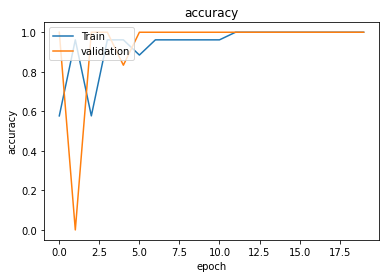

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

It's me


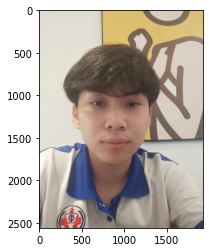

In [8]:
url='../input/hung-test/z3410617960588_212c155aaeb513e7db43f4e708a3bef2.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
kq=np.argmax(model.predict(img))
if(kq==0): 
    print("It's me")
if(kq==1): 
    print("Not me")
